In [4]:
# Importing libraries
# Numpy for array operations and also to do calculations
import numpy as np
# Pandas for load dataset and manipulation of tabular data
import pandas as pd
# For plotting
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
%matplotlib inline

#from matplotlib import rcParams
#import matplotlib.gridspec as gridspec
#from IPython.core.pylabtools import figsize
#from datasist.structdata import detect_outliers

# For importing dataset from url
import urllib.request
# To interact with the underlying Operating System
import os
# For numerical computation and ML modeling phase
#import tensorflow as tf
# to manipulate date and time
#from datetime import datetime, timedelta
# Generate words cloud
#from wordcloud import WordCloud
# Import Images to notebook
#from IPython.display import Image
# For statistical analysis
from scipy import stats
# Set warnings to be ignored
import warnings
warnings.filterwarnings("ignore")

In [5]:
def remove_outliers(df, columns, iqr_coefficient=1.5):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - iqr_coefficient * IQR
    upper_fence = Q3 + iqr_coefficient * IQR
    return df[~((df[columns] < lower_fence) | (df[columns] > upper_fence)).any(axis=1)]

In [6]:
df = pd.read_csv('autos.csv').drop('index', axis=1)

In [7]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [8]:
df.shape

(371528, 20)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

### Data Understanding:

1. `dateCrawled` : the date the ad was first seen (Date).
2. `name`: name of the car (String).
3. `seller`: type (private or dealer) (String).
4. `offerType`: Type of offer (e.g. sale, repair, etc.) (String).
5. `price`: Target variable (Integer).
6. `abtest`: A/B testing information (String).
7. `vehicleType`: type of vehicle (String).
8. `yearOfRegistration`: year at which the car was first registered (String).
9. `gearbox`: type of gear (String).
10. `powerPS`: output in PS (horsepower) (Integer).
11. `model`: model of car (String).
12. `kilometer`: howmany kilometers has it driven so far (Integer).
13. `monthOfRegistration`: (when it was first registered)(essentially giving us an idea about its age) (Integer).
14. `fuelType`: fuel used (petrol/diesel /electricity/lpg etc.) (String).
15. `brand`: name to which it belongs to (String).
16. `notRepairedDamage`: if there is any damage on the vehicle that has not been repaired yet (String).
17. `DateCreated`: gives us information when this particular advertisement was created in ebay or other place where these cars can be posted (Date).
18. `nrOfPictures`: field will give you an estimate regarding how many images have been included with this ad (Integer).
19. `postalCode`: contain info regarding area code where car have been posted (Integer).
20. `lastSeen`: give us time estimation when a crawler last scan this particular post online (Date).

### Drop irrelevant columns

In [10]:
df = df.drop(['name','dateCrawled','abtest','dateCreated','nrOfPictures','postalCode','lastSeen'], axis=1)

In [11]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000


### Check Missing Value

In [12]:
# missing values by each column
df.isnull().sum()

seller                     0
offerType                  0
price                      0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dtype: int64

In [13]:
# percentage of missing data
round(df.isnull().sum()/df.shape[0] * 100, 2)

seller                  0.00
offerType               0.00
price                   0.00
vehicleType            10.19
yearOfRegistration      0.00
gearbox                 5.44
powerPS                 0.00
model                   5.51
kilometer               0.00
monthOfRegistration     0.00
fuelType                8.99
brand                   0.00
notRepairedDamage      19.40
dtype: float64

In [14]:
# percentage is acceptable to drop all missing values
df_dropna = df.dropna()

In [15]:
df.shape

(371528, 13)

### Check for duplicates

In [16]:
# Check for duplicated values
df_dropna.duplicated().sum()

21951

In [17]:
# Remove duplicated values
df_dropna_dropdup = df_dropna.drop_duplicates()

In [18]:
df_dropna_dropdup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239005 entries, 3 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   seller               239005 non-null  object
 1   offerType            239005 non-null  object
 2   price                239005 non-null  int64 
 3   vehicleType          239005 non-null  object
 4   yearOfRegistration   239005 non-null  int64 
 5   gearbox              239005 non-null  object
 6   powerPS              239005 non-null  int64 
 7   model                239005 non-null  object
 8   kilometer            239005 non-null  int64 
 9   monthOfRegistration  239005 non-null  int64 
 10  fuelType             239005 non-null  object
 11  brand                239005 non-null  object
 12  notRepairedDamage    239005 non-null  object
dtypes: int64(5), object(8)
memory usage: 25.5+ MB


In [19]:
df_dropna_dropdup.head()

,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,privat,Angebot,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,privat,Angebot,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
5,privat,Angebot,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja
6,privat,Angebot,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein
7,privat,Angebot,0,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein


### Remove Outliers

In [20]:
# Target `Price` statistical description
df_dropna_dropdup["price"].describe()

count    2.390050e+05
mean     8.384606e+03
std      3.587087e+05
min      0.000000e+00
25%      1.500000e+03
50%      3.850000e+03
75%      8.690000e+03
max      1.000000e+08
Name: price, dtype: float64

In [21]:
3.587087e+05 - 3.850000e+03

354858.7

In [22]:
print(df_dropna_dropdup[df_dropna_dropdup['price'] > 1500000].shape)
print(df_dropna_dropdup[df_dropna_dropdup['price'] ==0].shape)
print(df_dropna_dropdup[df_dropna_dropdup['price'] <= 100].shape)
print(df_dropna_dropdup[(df_dropna_dropdup['price'] >100) & (df_dropna_dropdup['price']<1400)].shape)
print(df_dropna_dropdup[df_dropna_dropdup['price'] < 1000].shape)
df_dropna_dropdup.shape

(10, 13)
(2935, 13)
(3846, 13)
(49553, 13)
(37960, 13)


(239005, 13)

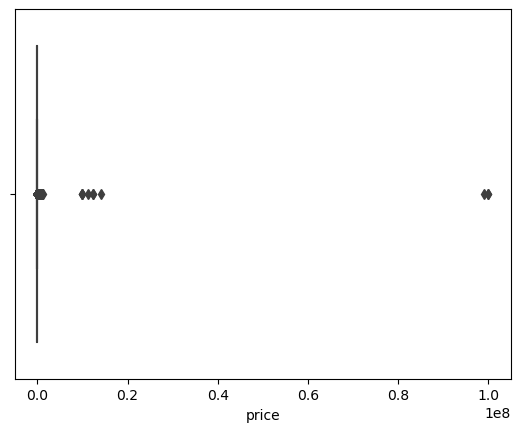

In [23]:
sns.boxplot(x='price', data=df_dropna_dropdup);

- The `mean` is greater than the `median` (`50%` count), our target is `Positively/Right skewed`.
- 2935 ads price is Zero.
- 3530 ads are less than $100. 
- 10 ad with prices more than $1.5 M which are too high.

Assuming the min price for a car is $ 1000

In [24]:
# Drop all rows that contain zeros and ads with price less than 1000
df_zeros= df_dropna_dropdup[(df_dropna_dropdup['price'] > 1000)]


In [25]:
df_zeros['price'].describe()

count    1.986250e+05
mean     9.965845e+03
std      3.934666e+05
min      1.001000e+03
25%      2.500000e+03
50%      4.999000e+03
75%      9.999000e+03
max      1.000000e+08
Name: price, dtype: float64

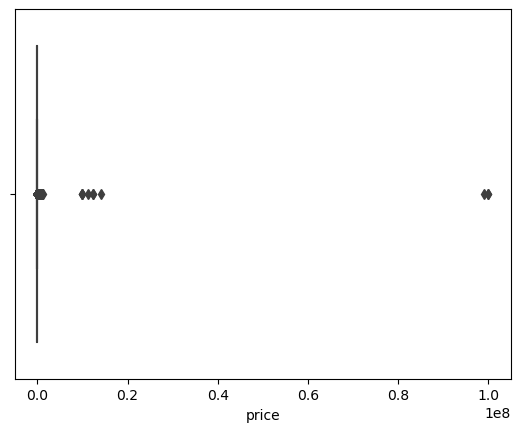

In [26]:
sns.boxplot(x='price', data=df_zeros);

In [27]:
df_no_outliers = remove_outliers( df_zeros, ['price'])

In [28]:
df_no_outliers['price'].describe()

count    185575.000000
mean       6200.991243
std        4795.735412
min        1001.000000
25%        2400.000000
50%        4600.000000
75%        8700.000000
max       21243.000000
Name: price, dtype: float64

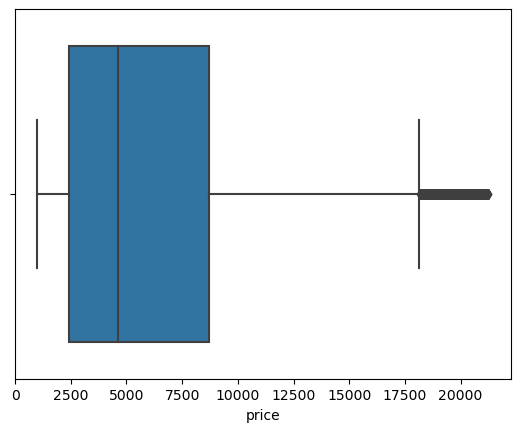

In [29]:
sns.boxplot(x='price', data=df_no_outliers);


In [30]:
# Check for outliers
#fig1 = px.histogram(df, x="price", histnorm='probability density',marginal="box")
#fig1.show();

In [31]:
# Check for Price distribution
#fig2 = px.histogram(df, x="price", marginal="violin", hover_data=df.columns)
#fig2.show();

In [32]:
df_no_outliers.shape

(185575, 13)

In [33]:
# Save dataframe as csv
df_no_outliers.to_csv('cleaned_autos.csv', index=False)